# PROJECT DESCRIPTION

# Retail Sales Analysis 

The objective of this project is to develop a predictive model that estimates sales revenue based on various factors such as units sold, discount percentage, marketing spend, and product category. By building a regression model, I aim to identify the key drivers of sales revenue and generate insights that can inform business decisions regarding pricing, promotions, and marketing strategies.

Key questions answered include: Can sales revenue be accurately predicted using these factors? (Yes, with reasonable accuracy), Which factors most influence sales revenue? (Units sold and product category), and What actions can businesses take based on these insights? (Optimize discount strategies and focus marketing on high-revenue product categories). The model provided valuable insights for improving pricing and promotional decisions.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

# DATA LOADING AND PROCESSING

In [3]:
RetailSales = pd.read_csv("Retail_sales.csv")
RetailSales.head() 

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [4]:
RetailSales.T

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
Store ID,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,...,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland,Spearsland
Product ID,52372247,52372247,52372247,52372247,52372247,52372247,52372247,52372247,52372247,52372247,...,50239115,50239115,50239115,50239115,50239115,50239115,50239115,50239115,50239115,50239115
Date,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29
Units Sold,9,7,1,4,2,8,6,9,7,1,...,5,7,9,10,7,5,3,6,5,3
Sales Revenue (USD),2741.69,2665.53,380.79,1523.16,761.58,3046.32,2284.74,3427.11,2665.53,380.79,...,2501.15,3151.45,4276.97,5002.3,3501.61,2501.15,1500.69,3001.38,2501.15,1425.66
Discount Percentage,20,0,0,0,0,0,0,0,0,0,...,0,10,5,0,0,0,0,0,0,5
Marketing Spend (USD),81,0,0,0,0,41,0,83,0,164,...,0,0,149,122,137,100,0,0,0,190
Store Location,Tanzania,Mauritania,Saint Pierre and Miquelon,Australia,Swaziland,Bhutan,Suriname,Taiwan,Papua New Guinea,Canada,...,Mongolia,Norfolk Island,Guam,Canada,Hong Kong,Malawi,Sudan,South Georgia and the South Sandwich Islands,Haiti,Mozambique
Product Category,Furniture,Furniture,Furniture,Furniture,Furniture,Furniture,Furniture,Furniture,Furniture,Furniture,...,Clothing,Clothing,Clothing,Clothing,Clothing,Clothing,Clothing,Clothing,Clothing,Clothing
Day of the Week,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,...,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday


In [5]:
RetailSales.describe() 

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,2.973833,49.944033
std,2.779759e+07,3.323929,2568.639288,5.974530,64.401655
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000


In [6]:
RetailSales.shape

(30000, 11)

In [7]:
RetailSales.columns

Index(['Store ID', 'Product ID', 'Date', 'Units Sold', 'Sales Revenue (USD)',
       'Discount Percentage', 'Marketing Spend (USD)', 'Store Location',
       'Product Category', 'Day of the Week', 'Holiday Effect'],
      dtype='object')

In [8]:
RetailSales.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

In [9]:
RetailSales.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Product ID,30000.0,4.461294e+07,2.779759e+07,3636541.0,2.228600e+07,40024486.00,65593523.00,96282526.00
Units Sold,30000.0,6.161967e+00,3.323929e+00,0.0,4.000000e+00,6.00,8.00,56.00
Sales Revenue (USD),30000.0,2.749510e+03,2.568639e+03,0.0,8.825925e+02,1902.42,3863.92,27165.88
Discount Percentage,30000.0,2.973833e+00,5.974530e+00,0.0,0.000000e+00,0.00,0.00,20.00
Marketing Spend (USD),30000.0,4.994403e+01,6.440165e+01,0.0,0.000000e+00,1.00,100.00,199.00


# EXPLORATORY DATA ANALYSIS

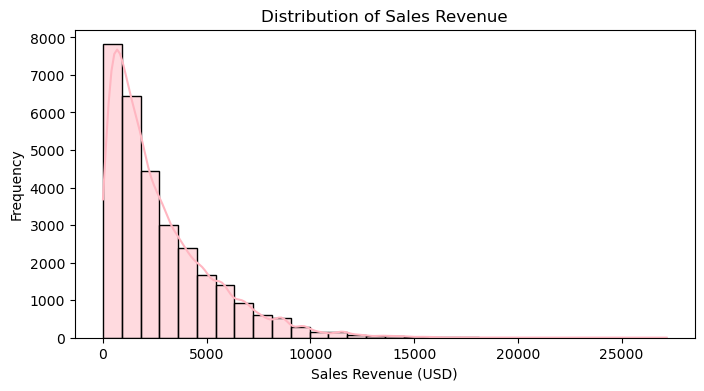

In [10]:
plt.figure(figsize=(8, 4)) 
sns.histplot(RetailSales['Sales Revenue (USD)'], bins=30, kde=True, color='lightpink') 
plt.title('Distribution of Sales Revenue')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

# 

This histogram represents the distribution of sales revenue (in USD), showing that most sales revenue values are concentrated at the lower end of the scale. The KDE (kernel density estimate) overlay, represented in pink, indicates a right-skewed distribution, meaning a small proportion of sales generate higher revenues, while the majority fall within lower revenue ranges.

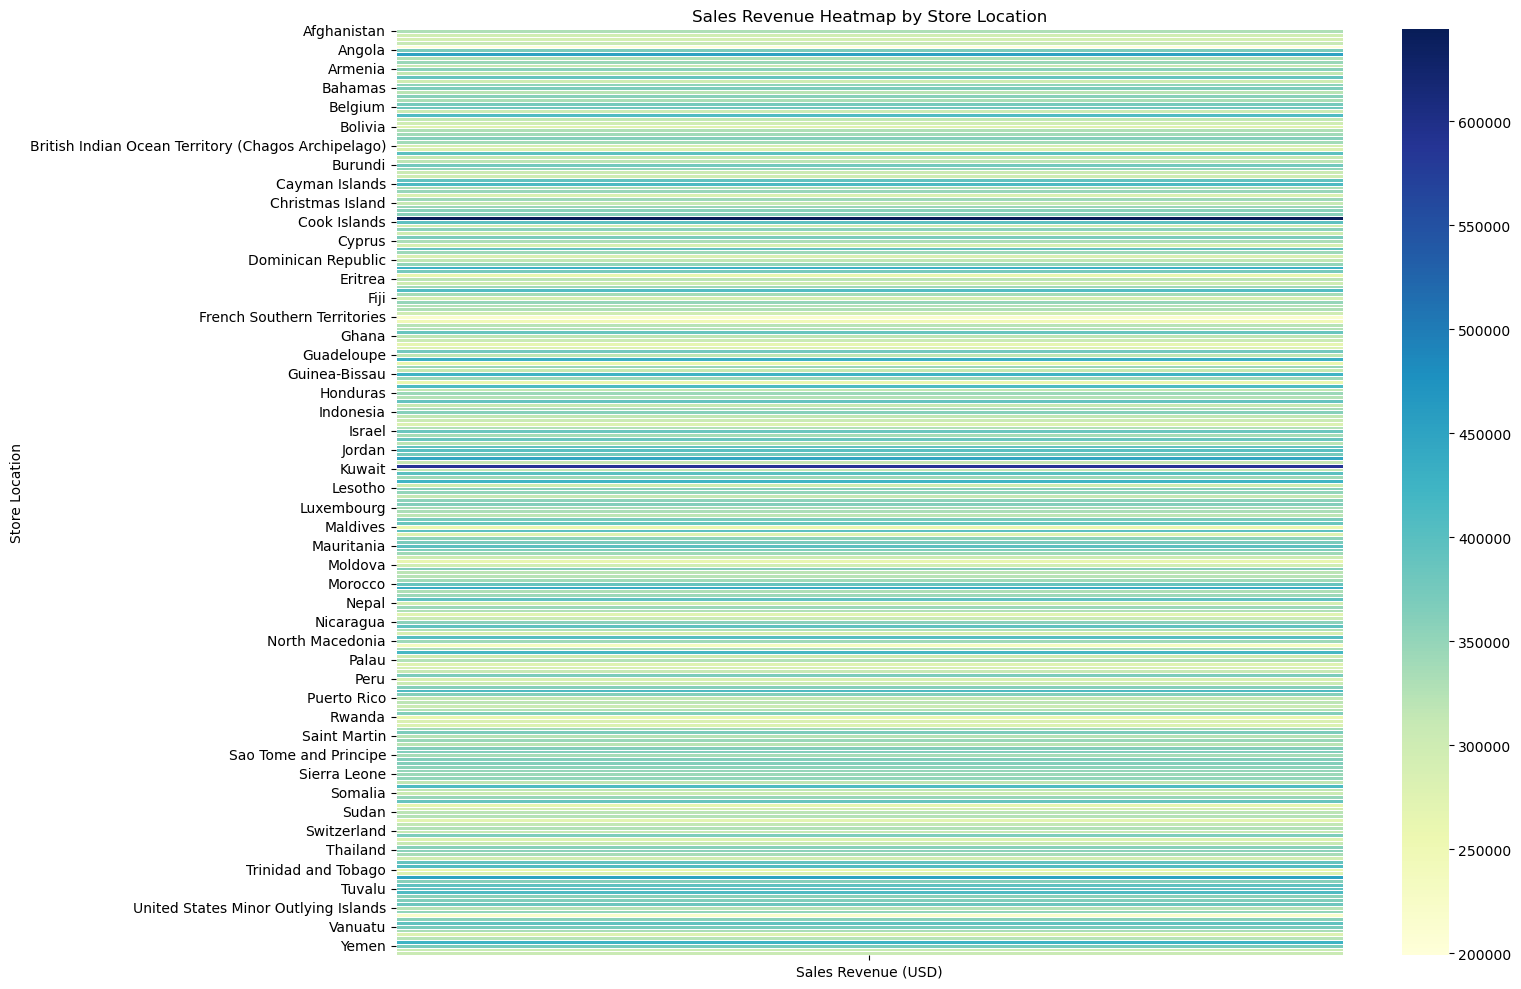

In [11]:
sales_pivot = RetailSales.pivot_table(index='Store Location', values='Sales Revenue (USD)', aggfunc='sum')

plt.figure(figsize=(16, 10))
sns.heatmap(sales_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Sales Revenue Heatmap by Store Location')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()

# 
This heatmap illustrates the distribution of sales revenue across various store locations, with darker shades representing higher revenue and lighter shades indicating lower revenue. Notable locations, such as Cook Island and Kuwait, show higher sales concentrations, while most other locations have moderate to low revenue.

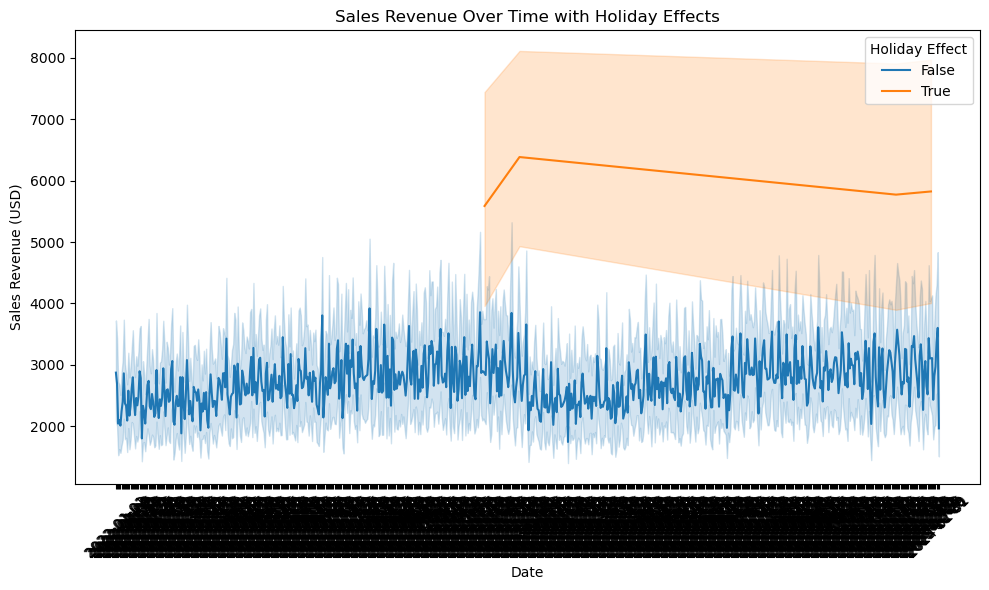

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=RetailSales)
plt.title('Sales Revenue Over Time with Holiday Effects')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend(title='Holiday Effect')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#
This line graph shows sales revenue over time, comparing periods with and without holiday effects. The orange line, representing the holiday effect, indicates higher sales during holidays, while non-holiday periods (blue line) show more frequent fluctuations with lower overall sales.

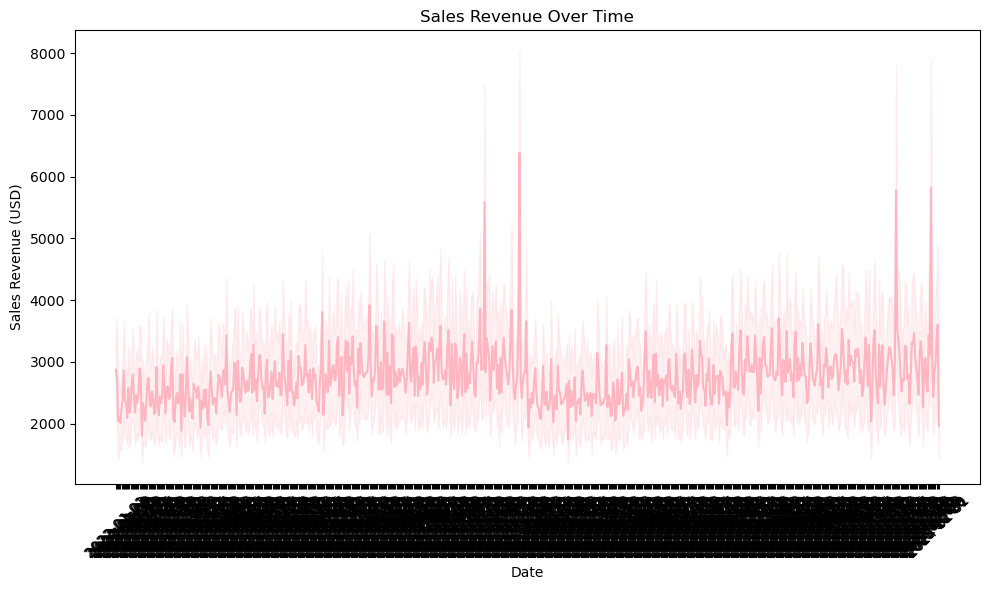

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales Revenue (USD)', data=RetailSales, color='lightpink')
plt.title('Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 
This line graph depicts the sales revenue trend over time, showing consistent fluctuations with occasional spikes, particularly during certain months. The spikes suggest periods of higher sales, likely due to external factors such as promotions, holidays, or seasonal trends.

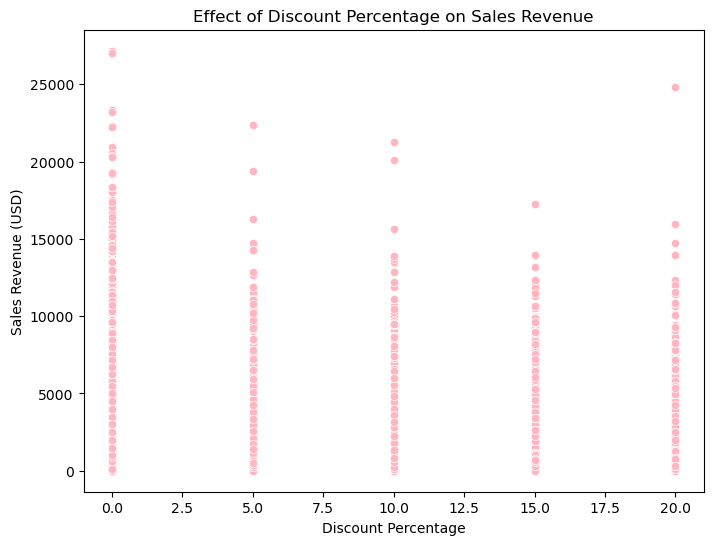

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount Percentage', y='Sales Revenue (USD)', data=RetailSales, color='lightpink')
plt.title('Effect of Discount Percentage on Sales Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Revenue (USD)')
plt.show()

 #
The scatter plot shows the relationship between discount percentages and sales revenue, with each point representing a transaction. The data indicates that even at higher discount levels (e.g., 15-20%), sales revenue can still reach significant values, though the highest revenues are observed when no discounts (0%) are applied.

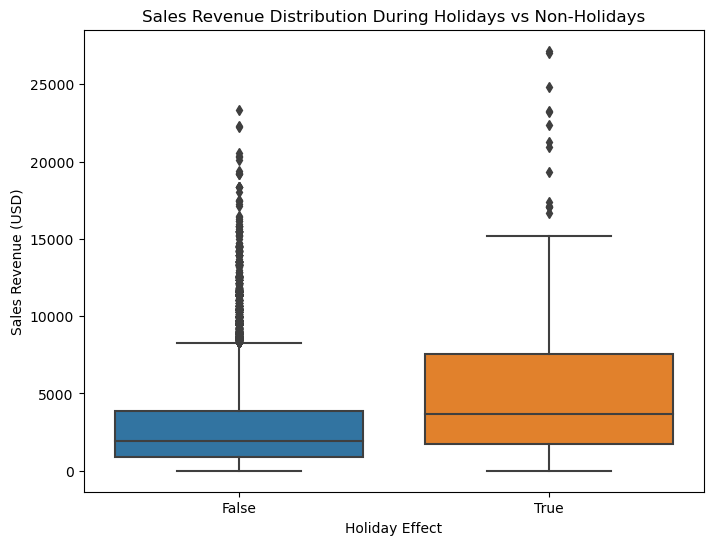

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday Effect', y='Sales Revenue (USD)', data=RetailSales)
plt.title('Sales Revenue Distribution During Holidays vs Non-Holidays')
plt.xlabel('Holiday Effect')
plt.ylabel('Sales Revenue (USD)')
plt.show()

#
The box plot compares sales revenue during holiday periods (True) and non-holiday periods (False). It shows that sales during holidays tend to have a higher median and wider distribution, with more outliers indicating larger revenue spikes, whereas non-holiday periods have a lower median and more concentrated revenue distribution.

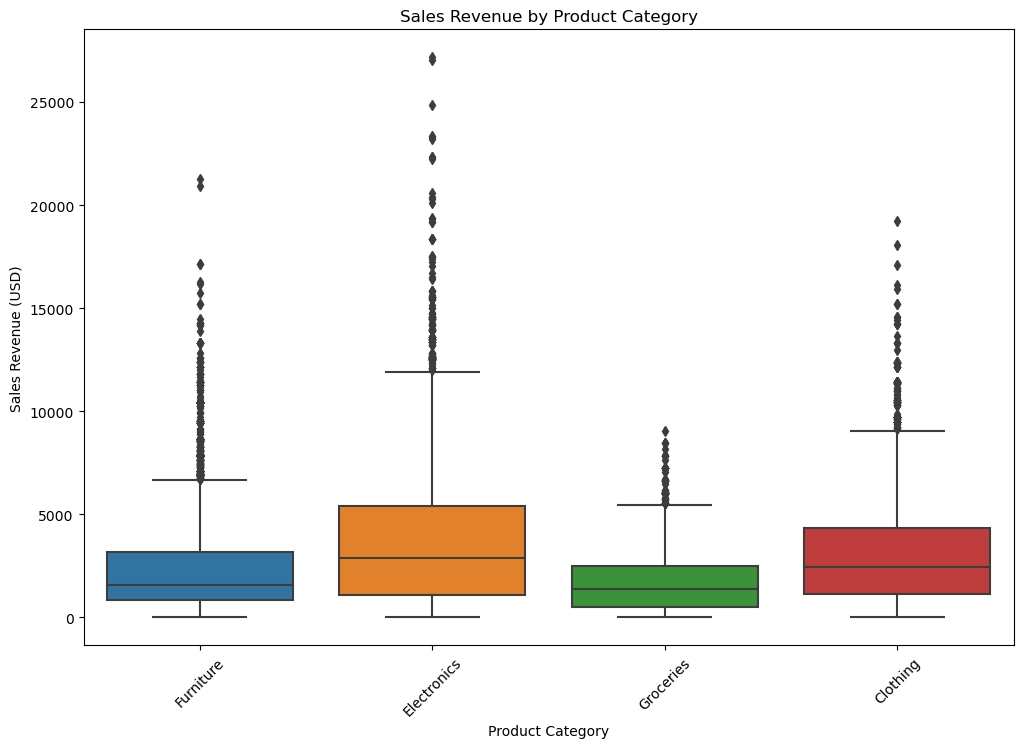

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Sales Revenue (USD)', data=RetailSales)
plt.title('Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

#
This box plot compares the sales revenue distribution across different product categories, showing that electronics and furniture have the highest potential for large sales, with more outliers indicating occasional higher revenues. Groceries and clothing have lower median sales, with fewer extreme values, suggesting more consistent but smaller revenue amounts.

# TIME SERIES ANALYSIS

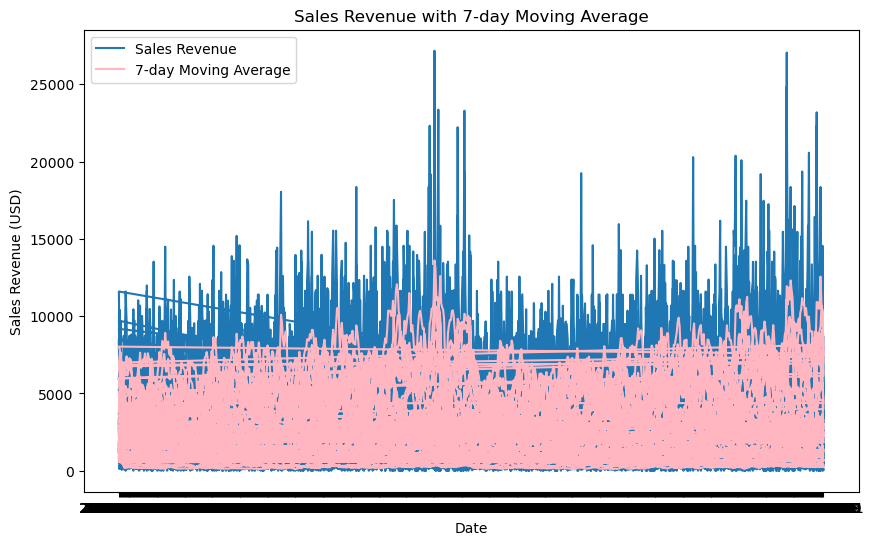

In [17]:
RetailSales['Sales Revenue (USD)'] = pd.to_numeric(RetailSales['Sales Revenue (USD)'])
RetailSales.set_index('Date', inplace=True)
RetailSales['7_day_MA'] = RetailSales['Sales Revenue (USD)'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(RetailSales['Sales Revenue (USD)'], label='Sales Revenue')
plt.plot(RetailSales['7_day_MA'], label='7-day Moving Average', color='lightpink')
plt.title('Sales Revenue with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend()
plt.show()

# 
The line graph shows the sales revenue over time, with the blue line representing actual daily sales and the pink line representing the 7-day moving average. The moving average smooths out the daily fluctuations, providing a clearer trend of sales performance over time, while the daily revenue shows more volatility with occasional spikes.

# CORRELATION

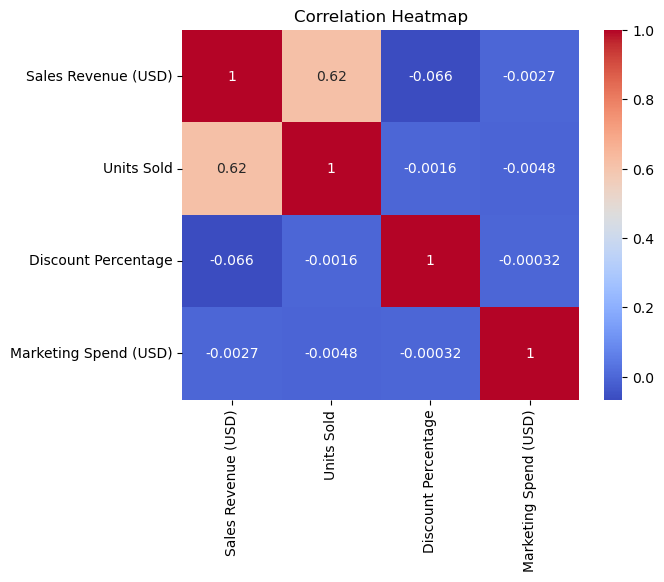

In [18]:
correlation_matrix = RetailSales[['Sales Revenue (USD)', 'Units Sold', 'Discount Percentage', 'Marketing Spend (USD)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#
This correlation heatmap shows the relationships between sales revenue, units sold, discount percentage, and marketing spend. There is a strong positive correlation between sales revenue and units sold (0.62), while other variables, such as discount percentage and marketing spend, show minimal or negative correlations with sales revenue.

# CUSTOMER SEGMENTATION

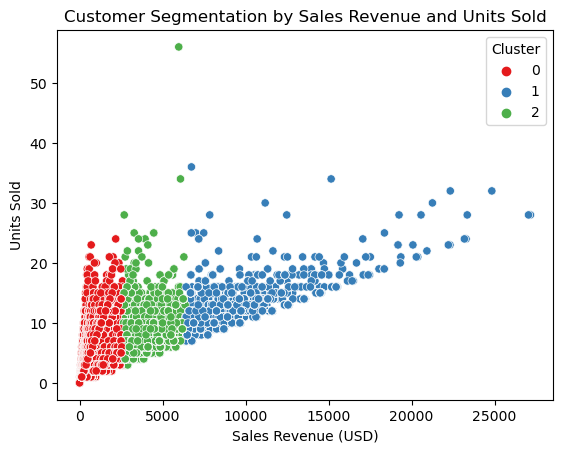

In [19]:
from sklearn.cluster import KMeans
features = RetailSales[['Sales Revenue (USD)', 'Units Sold', 'Discount Percentage', 'Marketing Spend (USD)']]

kmeans = KMeans(n_clusters=3)
RetailSales['Cluster'] = kmeans.fit_predict(features)

sns.scatterplot(x='Sales Revenue (USD)', y='Units Sold', hue='Cluster', data=RetailSales, palette='Set1')
plt.title('Customer Segmentation by Sales Revenue and Units Sold')
plt.show()

#  
The scatter plot visualizes customer segmentation based on sales revenue and units sold, divided into three clusters (0, 1, 2) using a clustering algorithm. Each color represents a different segment, with cluster 0 (red) representing lower revenue and fewer units sold, cluster 1 (blue) indicating moderate revenue with lower sales, and cluster 2 (green) capturing higher revenue with more units sold.

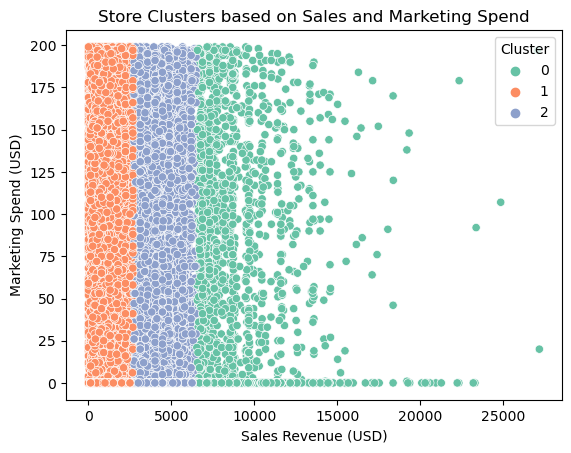

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

RetailSales_encoded = RetailSales.copy()
categorical_columns = ['Store ID', 'Product ID', 'Store Location', 'Product Category']


le = LabelEncoder()
for col in categorical_columns:
    if col in RetailSales_encoded.columns:
        RetailSales_encoded[col] = le.fit_transform(RetailSales_encoded[col])


X = RetailSales_encoded[['Sales Revenue (USD)', 'Marketing Spend (USD)']]

kmeans = KMeans(n_clusters=3, random_state=42)
RetailSales_encoded['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(x='Sales Revenue (USD)', y='Marketing Spend (USD)', hue='Cluster', data=RetailSales_encoded, palette='Set2')
plt.title('Store Clusters based on Sales and Marketing Spend')
plt.show()

# 
This scatter plot shows store clusters based on sales revenue and marketing spend, divided into three clusters (0, 1, 2). Cluster 0 (green) represents stores with low marketing spend and low sales revenue, Cluster 1 (blue) indicates moderate marketing spend and varying sales, and Cluster 2 (orange) captures stores with the highest marketing spend, generally leading to higher sales revenue.

# MODEL BUILDING

# LINEAR REGRESSION MODEL

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) and Target (y) for Linear Regression
X = RetailSales[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = RetailSales['Sales Revenue (USD)']  # Predicting continuous 'Sales Revenue (USD)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lin_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 4061317.4645276032
R² Score: 0.3879372193139927


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = RetailSales[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = RetailSales['Sales Revenue (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4061317.4645276032


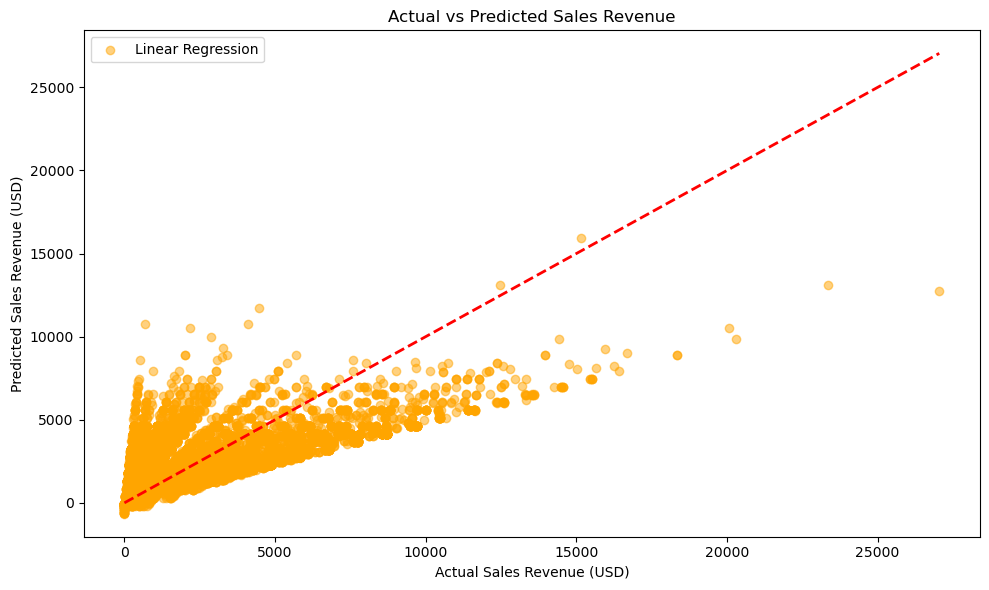

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Predicted Sales Revenue (USD)')
plt.title('Actual vs Predicted Sales Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# GRADIENT BOOSTING REGRESSOR MODEL

In [25]:
import pandas as pd
RetailSales = pd.read_csv("Retail_sales.csv")  
RetailSales.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

RetailSales = pd.read_csv("Retail_sales.csv")

# Encode categorical variables
categorical_columns = ['Store ID', 'Product ID', 'Store Location', 'Product Category', 'Day of the Week', 'Holiday Effect']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    RetailSales[col] = le.fit_transform(RetailSales[col])
    label_encoders[col] = le

# Select features (X) and target (y)
X = RetailSales.drop(columns=['Units Sold', 'Sales Revenue (USD)', 'Date'])  # Exclude target and irrelevant columns
y = RetailSales['Units Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = RetailSales[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = RetailSales['Sales Revenue (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Mean Squared Error (MSE) - Gradient Boosting: {mse_gbr}')
print(f'R² Score - Gradient Boosting: {r2_gbr}')


Mean Squared Error (MSE) - Gradient Boosting: 4086078.767979717
R² Score - Gradient Boosting: 0.384205555296914


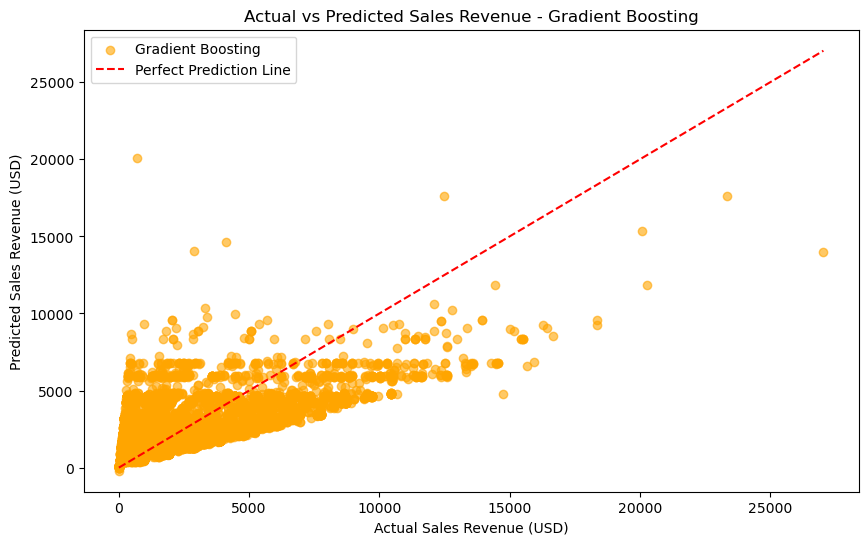

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = RetailSales[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = RetailSales['Sales Revenue (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

# Scatter plot for actual vs predicted sales revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='orange', alpha=0.6, label="Gradient Boosting")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")

# Add labels and title
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Predicted Sales Revenue (USD)')
plt.title('Actual vs Predicted Sales Revenue - Gradient Boosting')
plt.legend()
plt.show()


In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [31]:
 X = RetailSales[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = RetailSales['Sales Revenue (USD)']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (MSE) - XGBoost: {mse_xgb}')
print(f'R² Score - XGBoost: {r2_xgb}')

Mean Squared Error (MSE) - XGBoost: 4328263.046513453
R² Score - XGBoost: 0.3477070583799696


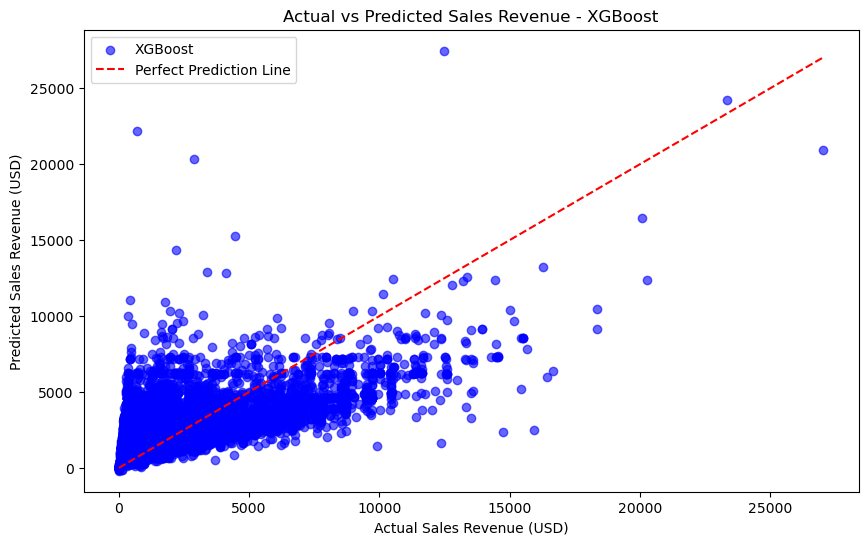

In [32]:
# Scatter plot for actual vs predicted sales revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6, label="XGBoost")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")

# Add labels and title
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Predicted Sales Revenue (USD)')
plt.title('Actual vs Predicted Sales Revenue - XGBoost')
plt.legend()
plt.show()

# CONCLUSION


In this analysis, I evaluated three different models; Linear Regression, Gradient Boosting, and XGBoost to predict sales revenue based on features like units sold, discounts, and marketing spend. 

Linear Regression is the best model for this analysis. It provides the most accurate predictions with the lowest error and the highest R² score. Although it is a simple model, it outperformed both Gradient Boosting and XGBoost in this particular dataset, likely because the relationship between the features and the target variable is not highly complex.
